# Compression Experiments using Real Data

# Imports

In [1]:
import numpy as np
import sys

from IPython.display import Image

sys.path.append('../')

import lib.io_utils as io
import lib.experiments as exp
import lib.static as static
import lib.datasets as data

## Small Traffic

In [2]:
G = io.read_graph("../" + data.small_traffic["path"] + "traffic.graph",
                  "../" + data.small_traffic["path"] + "traffic.data")
F = io.read_values("../" + data.small_traffic["path"] + "traffic.data", G)

In [3]:
print("#vertices = ", G.number_of_nodes())
print("#edges = ", len(G.edges()))

#vertices =  100
#edges =  128


In [8]:
algs = [static.OptWavelets(n=20), static.OptWavelets(), static.GRCWavelets(),
        static.Fourier(), static.HWavelets()]

comp_ratios = [0.1, 0.20, 0.30, 0.40, 0.50, 0.60]

res_smt, time_smt = exp.compression_experiment(G, np.array(F),
                                               algs, comp_ratios, 10)

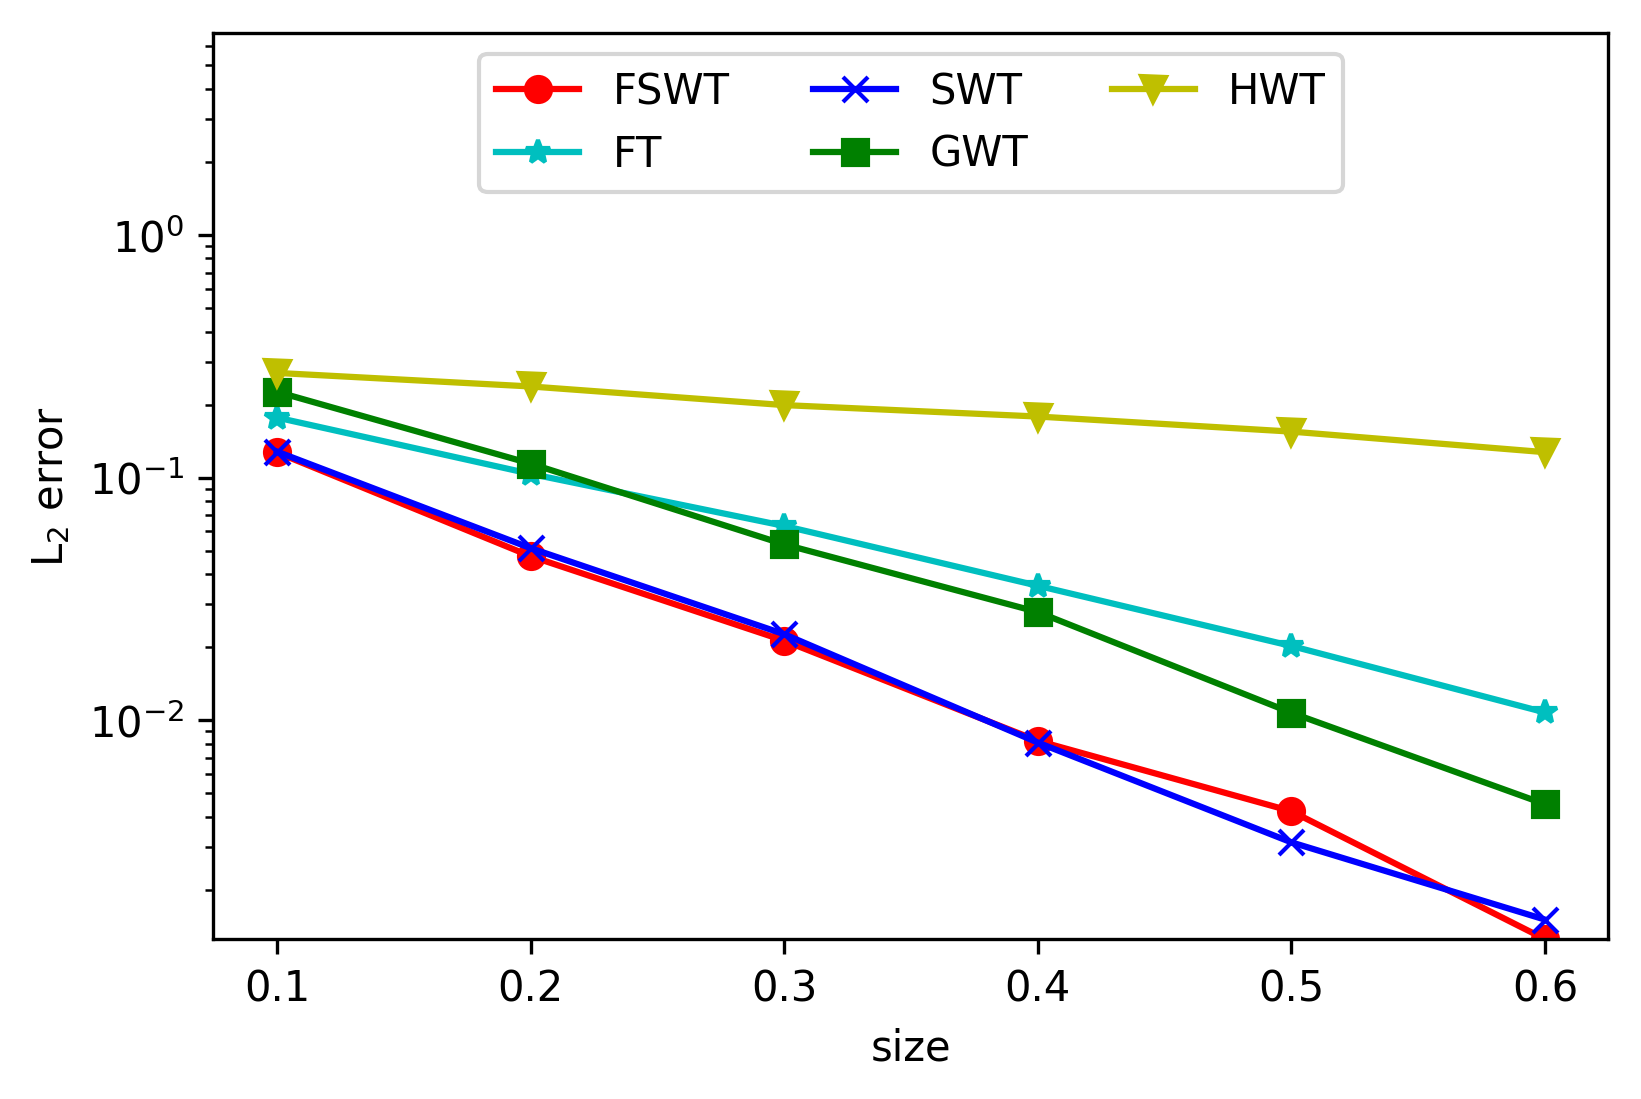

In [9]:
exp.plot_compression_experiments(res_smt, comp_ratios,
                                 "../figs/compression_small_traffic.png")
Image(filename="../figs/compression_small_traffic.png")

### Reconstruction Error: SWT vs GWT

In [21]:
reduction = np.divide(res_smt['SWT'], res_smt['GWT']) - 1
text = "{:>15s}|{:>15s}|{:>15s}\n".format('GWT error', 'SWT error', 'Reduction')
text += "-"*47 + "\n"
for i in range(len(comp_ratios)):
    text += "{:>15.7f}|{:>15.7f}|{:>15.7f}\n".format(res_smt['GWT'][i], res_smt['SWT'][i], reduction[i])
print(text)

      GWT error|      SWT error|      Reduction
-----------------------------------------------
      0.2258367|      0.1280286|     -0.4330920
      0.1142181|      0.0512101|     -0.5516460
      0.0530751|      0.0226301|     -0.5736211
      0.0279236|      0.0080920|     -0.7102105
      0.0107338|      0.0031385|     -0.7076054
      0.0045087|      0.0015076|     -0.6656293



### Reconstruction Error: FSWT vs GWT

In [24]:
reduction = np.divide(res_smt['FSWT'], res_smt['GWT']) - 1
text = "{:>15s}|{:>15s}|{:>15s}\n".format('GWT error', 'FSWT error', 'Reduction')
text += "-"*47 + "\n"
for i in range(len(comp_ratios)):
    text += "{:>15.7f}|{:>15.7f}|{:>15.7f}\n".format(res_smt['GWT'][i], res_smt['FSWT'][i], reduction[i])
print(text)

      GWT error|      SWT error|      Reduction
-----------------------------------------------
      0.2258367|      0.1269770|     -0.4377488
      0.1142181|      0.0474275|     -0.5847640
      0.0530751|      0.0212761|     -0.5991323
      0.0279236|      0.0082267|     -0.7053843
      0.0107338|      0.0042162|     -0.6072049
      0.0045087|      0.0012525|     -0.7222055



## Traffic

In [25]:
G = io.read_graph("../" + data.traffic["path"] + "traffic.graph",
                  "../" + data.traffic["path"] + "traffic.data")
F = io.read_values("../" + data.traffic["path"] + "traffic.data", G)

In [26]:
print("#vertices = ", G.number_of_nodes())
print("#edges = ", len(G.edges()))

#vertices =  1923
#edges =  2659


In [27]:
algs = [static.OptWavelets(n=20), static.GRCWavelets(), static.Fourier(), static.HWavelets()]

comp_ratios = [0.1, 0.20, 0.30, 0.40, 0.50, 0.60]

res_t, time_t = exp.compression_experiment(G, F, algs, comp_ratios, 10)

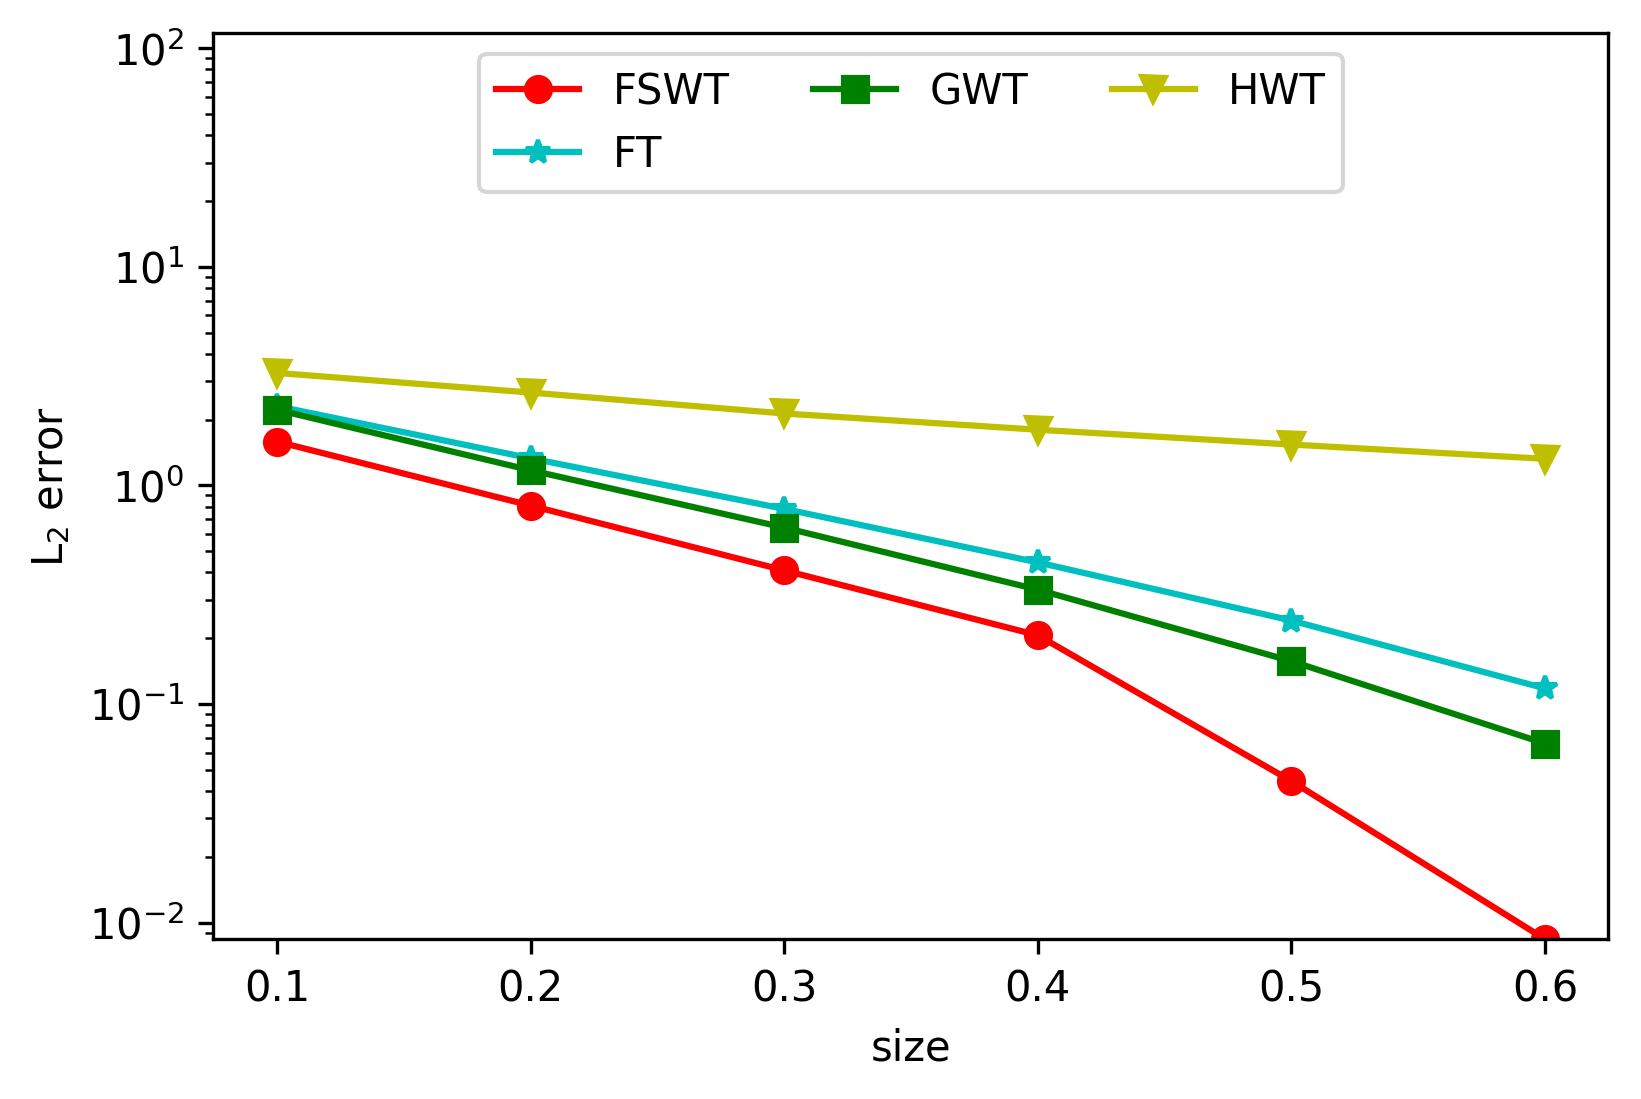

In [28]:
exp.plot_compression_experiments(res_t, comp_ratios,
                                 "../figs/compression_traffic.png")
Image(filename="../figs/compression_traffic.png")

### Reconstruction Error: FSWT vs GWT

In [29]:
reduction = np.divide(res_t['FSWT'], res_t['GWT']) - 1
text = "{:>15s}|{:>15s}|{:>15s}\n".format('GWT error', 'FSWT error', 'Reduction')
text += "-"*47 + "\n"
for i in range(len(comp_ratios)):
    text += "{:>15.7f}|{:>15.7f}|{:>15.7f}\n".format(res_t['GWT'][i], res_t['FSWT'][i], reduction[i])
print(text)

      GWT error|      SWT error|      Reduction
-----------------------------------------------
      2.2200923|      1.5877000|     -0.2848496
      1.1735329|      0.8091524|     -0.3104988
      0.6413987|      0.4088434|     -0.3625753
      0.3337205|      0.2063473|     -0.3816763
      0.1571017|      0.0444101|     -0.7173164
      0.0660063|      0.0084063|     -0.8726447



## Human

In [30]:
G = io.read_graph("../" + data.human["path"] + "human.graph",
                  "../" + data.human["path"] + "human.data")
F = io.read_values("../" + data.human["path"] + "human.data", G)

In [33]:
print("#vertices = ", G.number_of_nodes())
print("#edges = ", len(G.edges()))

#vertices =  845
#edges =  1272


In [34]:
algs = [static.OptWavelets(n=20), static.GRCWavelets(), static.Fourier(), static.HWavelets()]

comp_ratios = [0.1, 0.20, 0.30, 0.40, 0.50, 0.60]

res_h, time_h = exp.compression_experiment(G, F, algs, comp_ratios, 10)

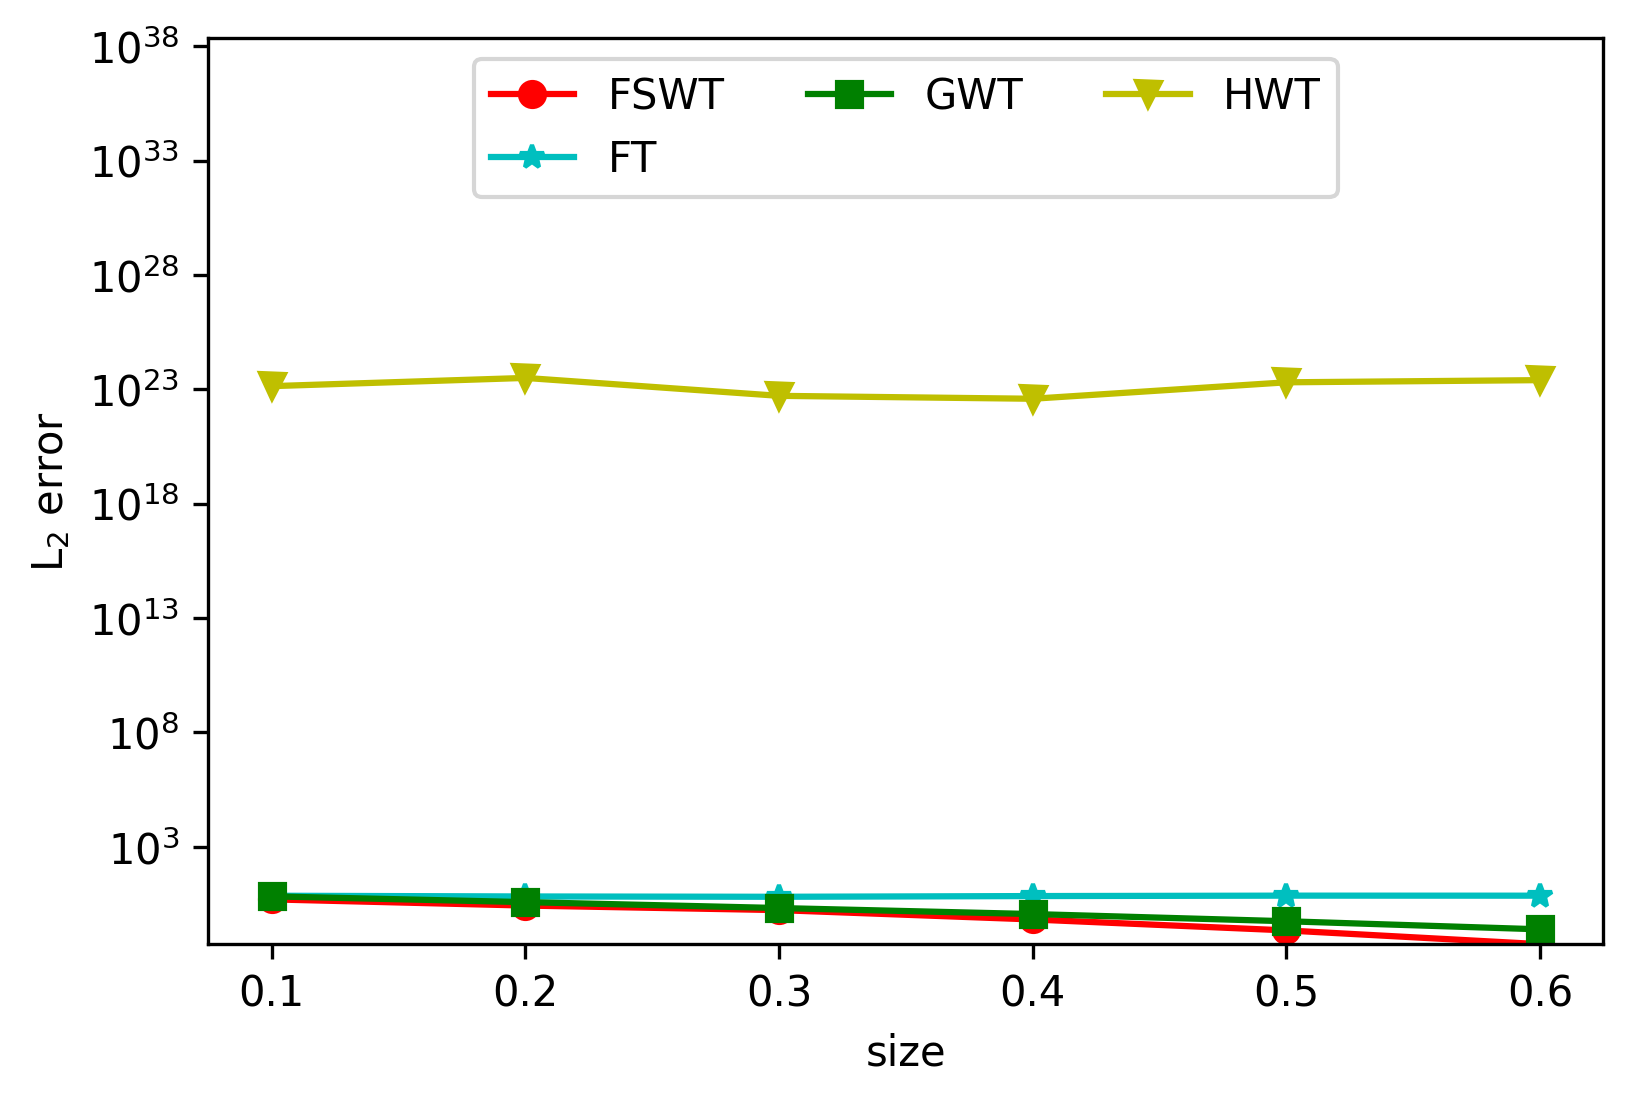

In [35]:
exp.plot_compression_experiments(res_h, comp_ratios,
                                 "../figs/compression_human.png")
Image(filename="../figs/compression_human.png")

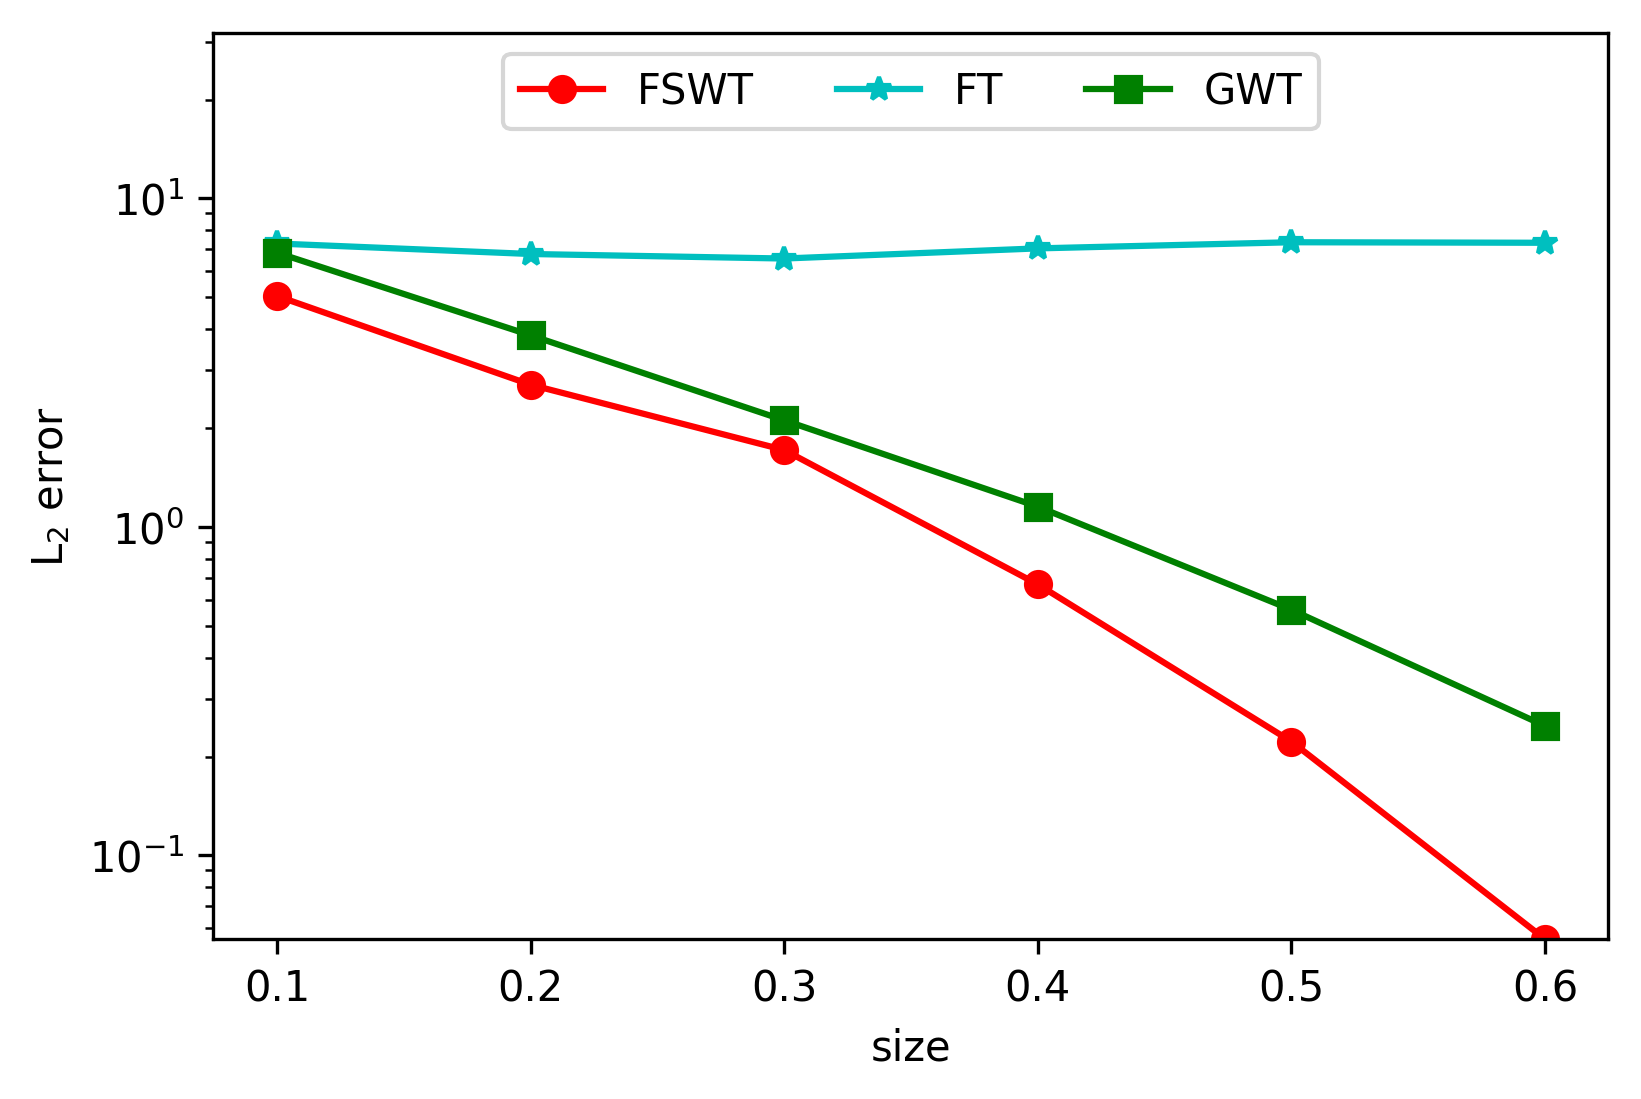

In [59]:
res_h_copy = dict(res_h)
res_h_copy.pop('HWT')

exp.plot_compression_experiments(res_h_copy, comp_ratios,
                                 "../figs/compression_human2.png")
Image(filename="../figs/compression_human2.png")

### Reconstruction Error: FSWT vs GWT

In [36]:
reduction = np.divide(res_h['FSWT'], res_h['GWT']) - 1
text = "{:>15s}|{:>15s}|{:>15s}\n".format('GWT error', 'FSWT error', 'Reduction')
text += "-"*47 + "\n"
for i in range(len(comp_ratios)):
    text += "{:>15.7f}|{:>15.7f}|{:>15.7f}\n".format(res_h['GWT'][i], res_h['FSWT'][i], reduction[i])
print(text)

      GWT error|     FSWT error|      Reduction
-----------------------------------------------
      6.8382095|      5.0477291|     -0.2618347
      3.8316544|      2.7098935|     -0.2927615
      2.1117686|      1.7143273|     -0.1882031
      1.1529724|      0.6686821|     -0.4200363
      0.5595893|      0.2221975|     -0.6029275
      0.2478246|      0.0556169|     -0.7755798



## Wikipedia

In [60]:
G = io.read_graph("../" + data.wiki["path"] + "wiki.graph",
                  "../" + data.wiki["path"] + "wiki.data")
F = io.read_values("../" + data.wiki["path"] + "wiki.data", G)

In [61]:
print("#vertices = ", G.number_of_nodes())
print("#edges = ", len(G.edges()))

#vertices =  4881
#edges =  11937


In [38]:
algs = [static.OptWavelets(n=20), static.GRCWavelets(), static.Fourier(), static.HWavelets()]

comp_ratios = [0.1, 0.20, 0.30, 0.40, 0.50, 0.60]
sys.setrecursionlimit(G.number_of_nodes())
res_w, time_w = exp.compression_experiment(G, F, algs, comp_ratios, 1)

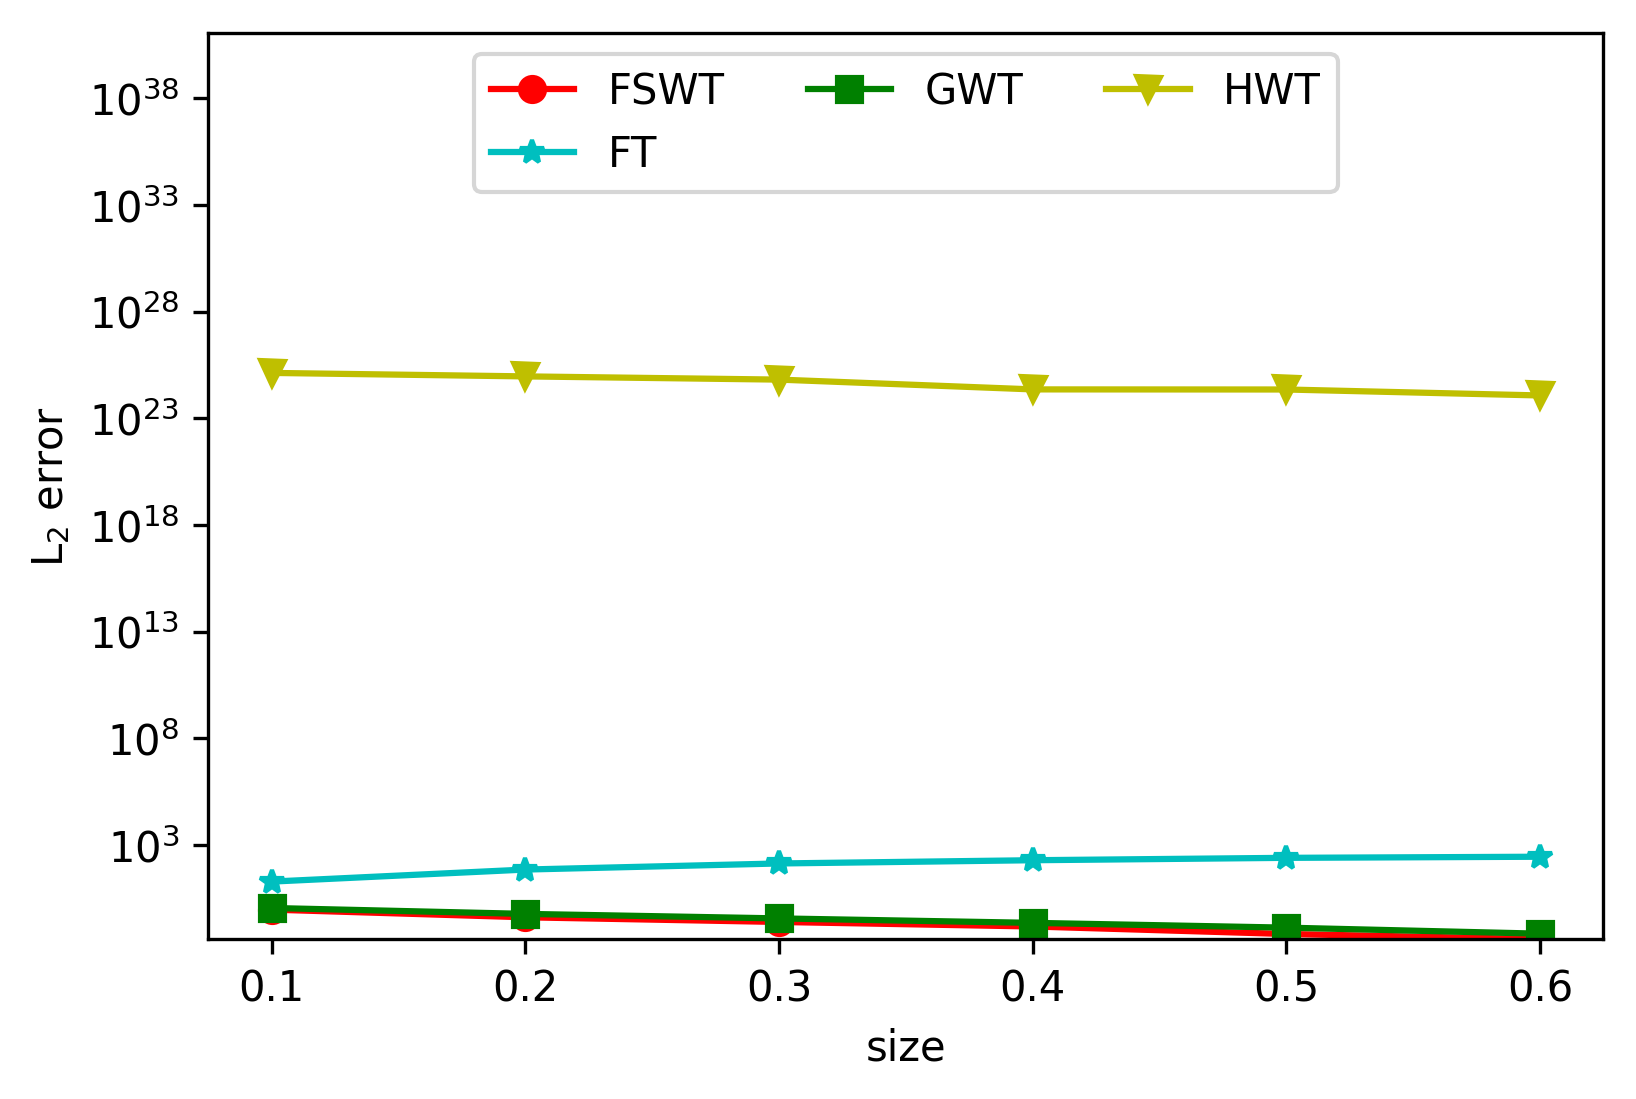

In [39]:
exp.plot_compression_experiments(res_w, comp_ratios,
                                 "../figs/compression_wiki.png")
Image(filename="../figs/compression_wiki.png")

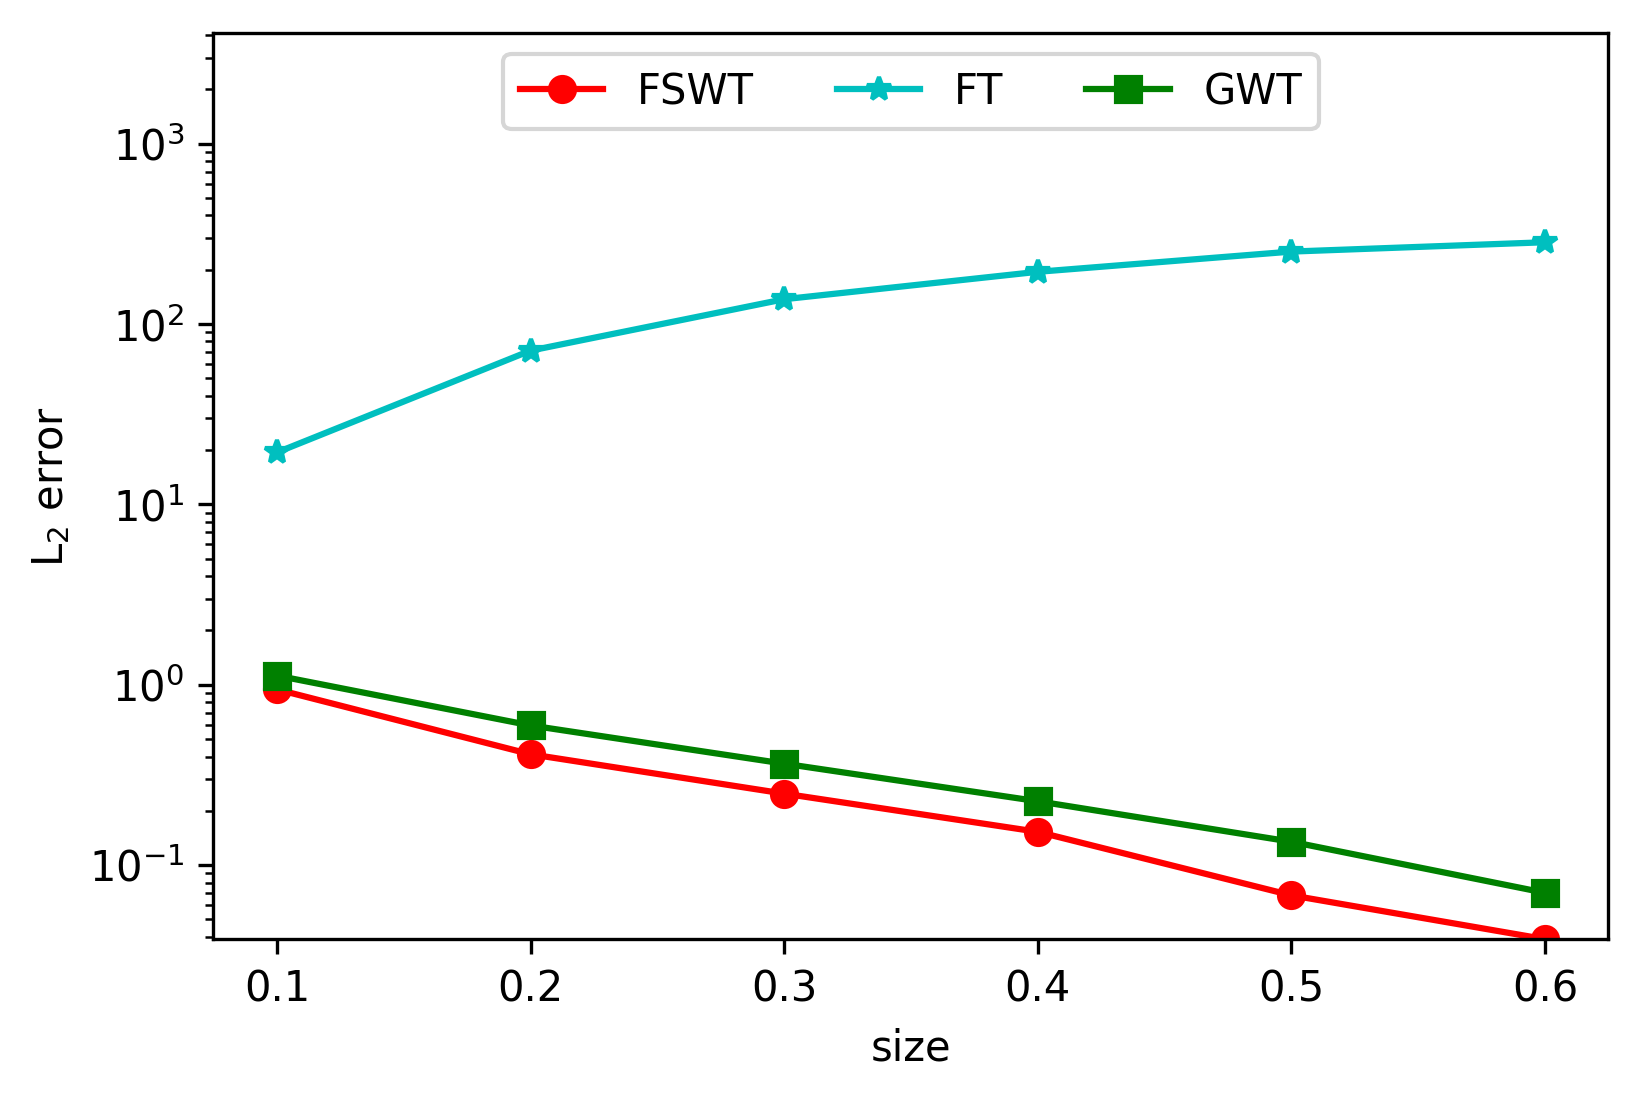

In [58]:
res_w_copy = dict(res_w)
res_w_copy.pop('HWT')

exp.plot_compression_experiments(res_w_copy, comp_ratios,
                                 "../figs/compression_wiki2.png")
Image(filename="../figs/compression_wiki2.png")

### Reconstruction Error: FSWT vs GWT

In [40]:
reduction = np.divide(res_w['FSWT'], res_w['GWT']) - 1
text = "{:>15s}|{:>15s}|{:>15s}\n".format('GWT error', 'FSWT error', 'Reduction')
text += "-"*47 + "\n"
for i in range(len(comp_ratios)):
    text += "{:>15.7f}|{:>15.7f}|{:>15.7f}\n".format(res_w['GWT'][i], res_w['FSWT'][i], reduction[i])
print(text)

      GWT error|     FSWT error|      Reduction
-----------------------------------------------
      1.1236578|      0.9424534|     -0.1612630
      0.5947244|      0.4116692|     -0.3077982
      0.3650694|      0.2490409|     -0.3178259
      0.2259673|      0.1528849|     -0.3234200
      0.1347382|      0.0679602|     -0.4956130
      0.0702006|      0.0388420|     -0.4466996



## Blogs

In [41]:
G = io.read_graph("../" + data.polblogs["path"] + "polblogs.graph",
                  "../" + data.polblogs["path"] + "polblogs.data")
F = io.read_values("../" + data.polblogs["path"] + "polblogs.data", G)

In [42]:
print("#vertices = ", G.number_of_nodes())
print("#edges = ", len(G.edges()))

#vertices =  1222
#edges =  16717


In [43]:
algs = [static.OptWavelets(n=20), static.GRCWavelets(), static.Fourier(), static.HWavelets()]

comp_ratios = [0.1, 0.20, 0.30, 0.40, 0.50, 0.60]

res_b, time_b = exp.compression_experiment(G, F, algs, comp_ratios, 10)

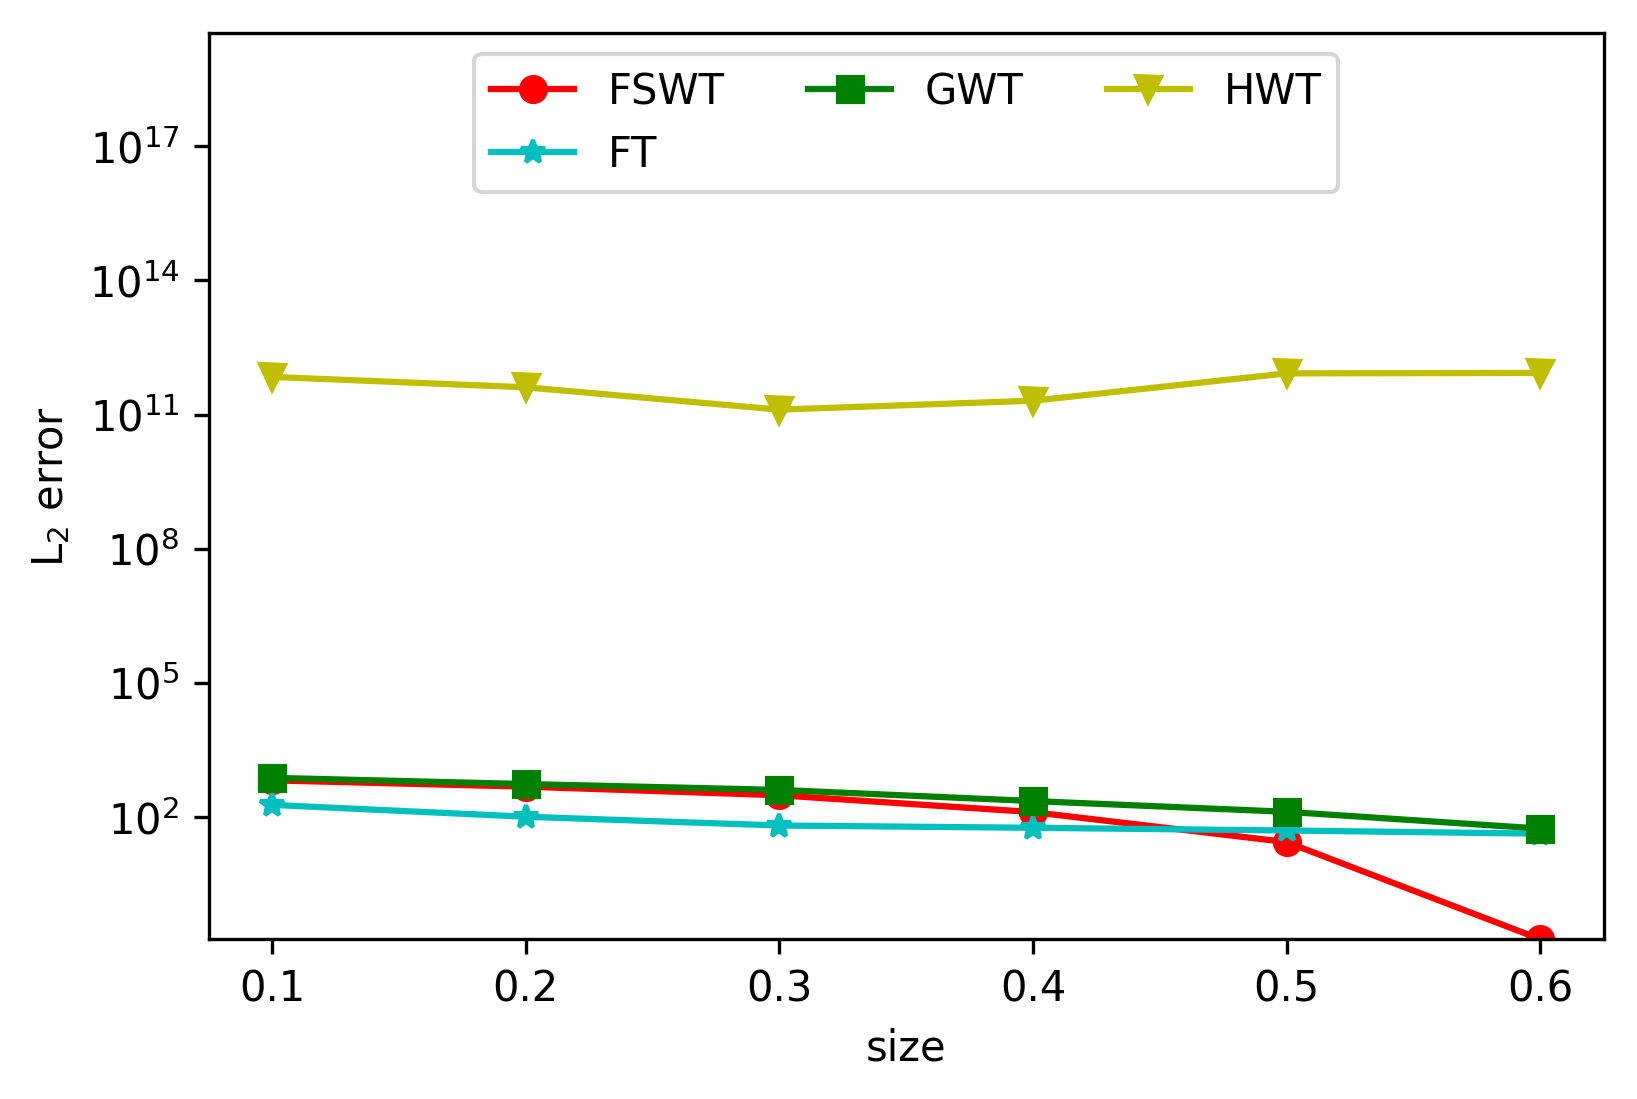

In [44]:
exp.plot_compression_experiments(res_b, comp_ratios,
                                 "../figs/compression_blog.png")
Image(filename="../figs/compression_blog.png")

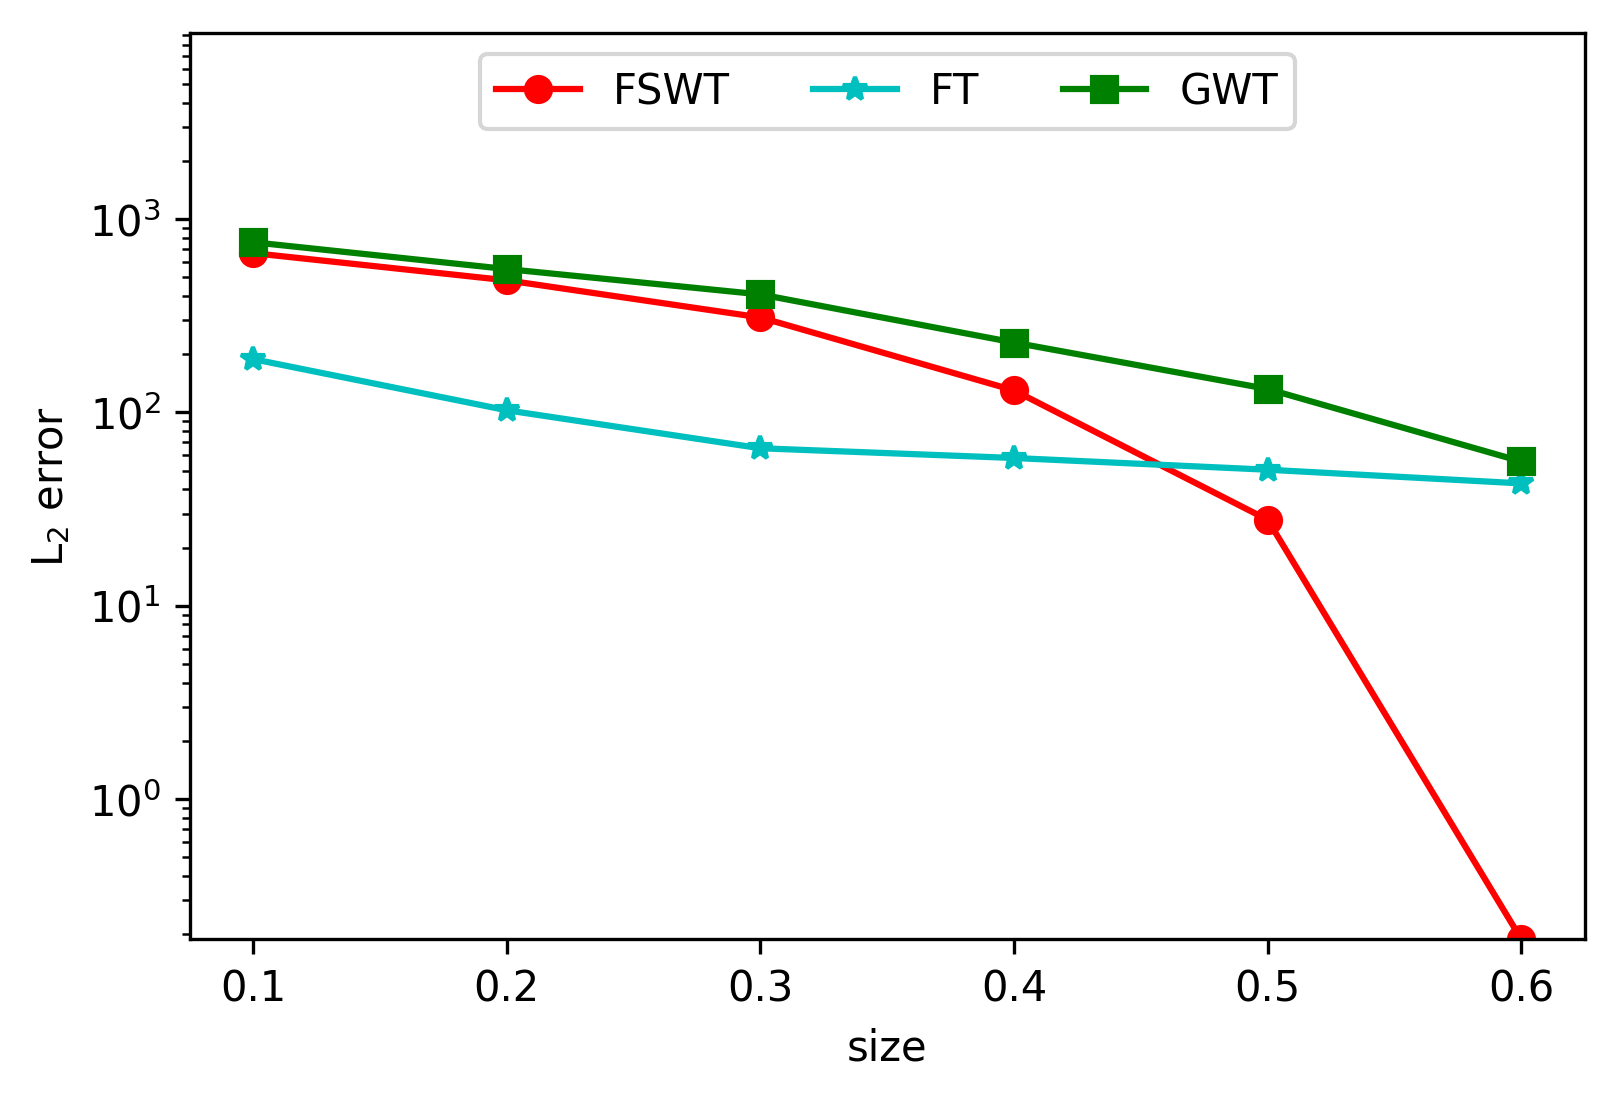

In [57]:
res_b.pop('HWT')
exp.plot_compression_experiments(res_b, comp_ratios,
                                 "../figs/compression_blog2.png")
Image(filename="../figs/compression_blog2.png")

### Reconstruction Error: FSWT vs GWT

In [45]:
reduction = np.divide(res_b['FSWT'], res_b['GWT']) - 1
text = "{:>15s}|{:>15s}|{:>15s}\n".format('GWT error', 'FSWT error', 'Reduction')
text += "-"*47 + "\n"
for i in range(len(comp_ratios)):
    text += "{:>15.7f}|{:>15.7f}|{:>15.7f}\n".format(res_b['GWT'][i], res_b['FSWT'][i], reduction[i])
print(text)

      GWT error|     FSWT error|      Reduction
-----------------------------------------------
    760.4954199|    667.9291131|     -0.1217184
    552.5279946|    483.1301899|     -0.1256005
    408.4589303|    310.3847051|     -0.2401079
    230.1754795|    130.1136140|     -0.4347199
    132.3424893|     27.8478488|     -0.7895774
     55.7708549|      0.1880823|     -0.9966276



## Average Computation Time (in seconds)

In [54]:
times = [time_smt, time_t, time_w, time_h, time_b]
algs = ['HWT', 'FT', 'GWT', 'SWT', 'FSWT']
transforms = ('Transform', 'Small Traffic', 'Traffic', 'Wikipedia', 'Human', 'Blogs')
text = "{:10s}|{:>15s}{:>15s}{:>15s}{:>15s}{:>15s}".format(*transforms) + "\n"
for alg in algs:
    text += "{:10s}|".format(alg)
    for time in times:
        msg = np.mean(time.get(alg, 0.))
        if msg != 0.:
            text += "{:>15.7f}".format(msg)
        else:
            text += "{:>15s}".format('Unavailable')
    text += "\n"

print(text)

Transform |  Small Traffic        Traffic      Wikipedia          Human          Blogs
HWT       |      0.1105079     53.0783952    379.8365982      5.1249488     10.7540500
FT        |      0.0714019     33.3342006    168.3058656      3.8720605      8.3236080
GWT       |      0.5620325     32.1109771    513.3351845     19.0809389     51.8282435
SWT       |      1.5199850    Unavailable    Unavailable    Unavailable    Unavailable
FSWT      |      0.5427060     23.3150091    517.8988918     20.3815869     52.4716242

